# Random variable generation

This notebook contains all the figure generation code for [Section 2.7 Random variable generation]() of the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
random.seed(16)
np.random.seed(16)

## Why simulate?


## Random variable generation using a computer

### Discrete random variable generation

Splitting up the uniform random variable ...

### Continuous random variable generation

See the book or explanations of the the invers-CDF trick.


#### Example 2: generating observations from a shifted uniform distribution



$V \sim \mathcal{U}(\alpha=100,\beta=120)$




In [4]:
def gen_v():
    u = random.random()
    v = 100 + 20*u
    return v

In [5]:
n = 100
vsample = [gen_v() for i in range(0,n)]

In [6]:
vsample[0:3]  # first three observations

[107.2304554982815, 109.60961331202589, 108.3390525321133]

In [7]:
min(vsample), max(vsample)  # Range

(100.18277874504243, 119.47768749052362)

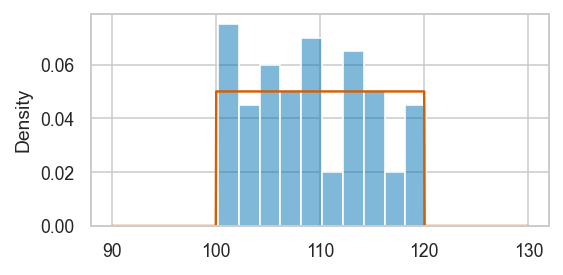

In [8]:
filename = "figures/prob/generate_vsample_and_pdf_rvV.pdf"
from scipy.stats import uniform
with plt.rc_context({"figure.figsize":(4,2)}):
    ax = sns.histplot(vsample, stat="density", alpha=0.5, binwidth=2)
    xs = np.linspace(90,130,1000)
    sns.lineplot(x=xs, y=uniform(100,20).pdf(xs), ax=ax, color="r")
    ax.figure.tight_layout()
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Example 3: generating observations from an exponential distribution

In [9]:
def gen_e(lam):
    u = random.random()
    e = -1 * np.log(1-u) / lam
    return e

Where `lam` is the $\lambda$ (lambda) parameter chosen for exponential model family.

In [10]:
np.random.seed(6)

n = 1000  # number of observations to generate
esample = [gen_e(lam=0.2) for i in range(0,n)]

In [11]:
esample[0:3]  # first three observations

[1.2162486854057013, 2.6887884784016904, 0.5728075553134541]

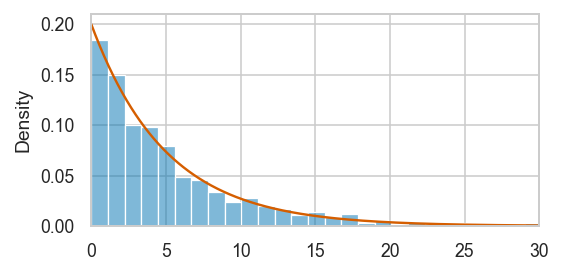

In [12]:
filename = "figures/prob/generate_exp_and_pdf_rvE.pdf"

# plot the pdf of the model
from scipy.stats import expon
lam = 0.2
rvE = expon(0,1/lam)

with plt.rc_context({"figure.figsize":(4,2)}):
    ax = sns.histplot(esample, stat="density", alpha=0.5)
    xs = np.linspace(0,30,1000)
    sns.lineplot(x=xs, y=rvE.pdf(xs), ax=ax, color="r")
    ax.set_xlim([0,30])
    ax.figure.tight_layout()
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

We'll develop various way to analyze this "goodness of fit" between the sample `esample` data we generated
and the theoretical model $f_E$ in the remainder of this notebook.

## Empirical distributions

Let's write a function that compute the value empirical cumulative distribution (eCDF) 
of the sample `data`. The function takes two inputs: `data` the sample of observations,
and `b`, the value where we want to evaluate the function.

In [13]:
def ecdf(data, b):
    sdata = np.sort(data)
    count = sum(sdata <= b)    # num. of obs. <= b
    return count / len(data)   # proportion of total

Note the sorting step is not strictly necessary,
but it guarantees the `sdata` is a NymPy `array` object which allows the comparison to work.

In [14]:
ecdf(vsample, 110)

0.59

In [15]:
ecdf(esample, 5)

0.633

### Visualizing the empirical cumulative distribution

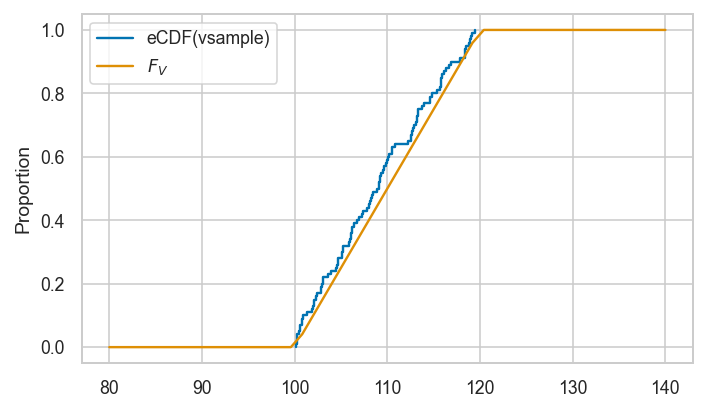

In [16]:
filename = "figures/prob/ecdf_vsample_and_cdf_plot_rvV.pdf"

from scipy.stats import uniform
rvV = uniform(100,20)

with plt.rc_context({"figure.figsize":(5,3)}):
    ax = sns.ecdfplot(vsample, label="eCDF(vsample)")
    bs = np.linspace(80,140)
    sns.lineplot(x=bs, y=rvV.cdf(bs), ax=ax, label="$F_V$")
    ax.figure.tight_layout()
    ax.set_ylim([-0.05,1.05])
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

In [17]:
# # ALT. manually plot ecdf using lineplot
# bs = np.linspace(80,140,1000)
# empFvs = [ecdf(vsample,b) for b in bs]
# sns.lineplot(x=bs, y=empFvs, drawstyle='steps-post')

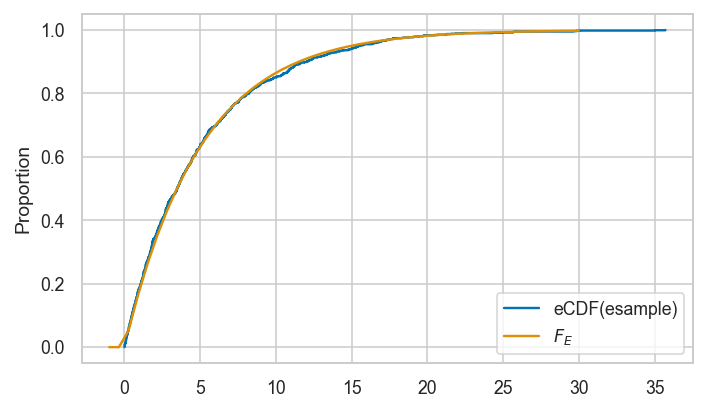

In [18]:
filename = "figures/prob/ecdf_esample_and_cdf_plot_rvE.pdf"
with plt.rc_context({"figure.figsize":(5,3)}):
    ax = sns.ecdfplot(esample, label="eCDF(esample)")
    bs = np.linspace(-1,30)
    sns.lineplot(x=bs, y=rvE.cdf(bs), ax=ax, label="$F_E$")
    ax.figure.tight_layout()
    ax.set_ylim([-0.05,1.05])
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

## Measuring data-model fit

Want to measure if `vsample` comes from $\mathcal{U}(100,120)$.
Here are the first five values we simulated:

In [19]:
vsample[0:3]

[107.2304554982815, 109.60961331202589, 108.3390525321133]

We also want to check if the data we generated `esample` comes from $\textrm{Expon}(\lambda=0.2)$.

In [20]:
esample[0:3]

[1.2162486854057013, 2.6887884784016904, 0.5728075553134541]

Let's also generate an additional sample `nsample`
from the normal distribution $\mathcal{N}(1000,100)$
so we'll be able to make a variety of comparisons.

In [21]:
np.random.seed(6)

In [22]:
from scipy.stats import norm
rvN = norm(1000, 100)
nsample = rvN.rvs(100)
nsample[0:3]

array([ 968.82163265, 1072.90039236, 1021.78207881])

### Visual comparison between data and model distributions



#### Shifted uniform distribution

Here is the code for comparison of `vsample` and the theoretical model `rvV` $= \mathcal{U}(100,120)$.

In [23]:
from scipy.stats import uniform
rvV = uniform(100,20)

(-0.05, 1.05)

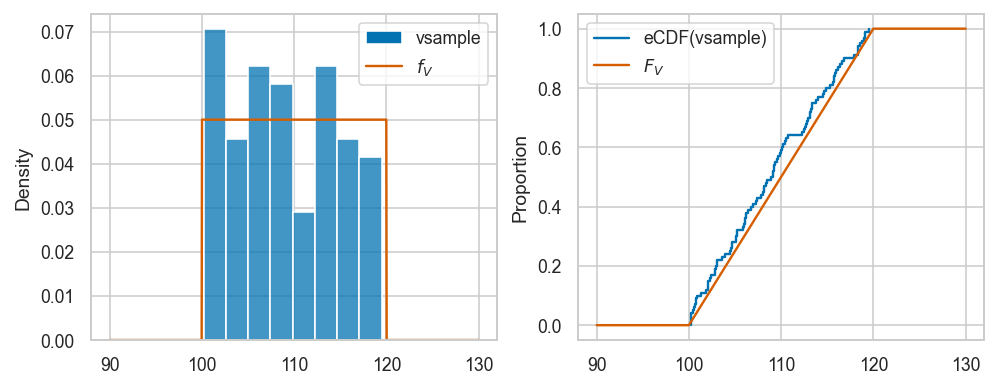

In [24]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
xs = np.linspace(90,130,1000)

# plot histogram of `vsample`
sns.histplot(vsample, stat="density", ax=axs[0], label="vsample")

# plot the pdf of rvV 
sns.lineplot(x=xs, y=rvV.pdf(xs), color="r", ax=axs[0], label="$f_V$")
lines, labels = axs[0].get_legend_handles_labels()
axs[0].legend(reversed(lines[0:2]), reversed(labels[0:2]))

# plot a empirical cumulative distribution
sns.ecdfplot(vsample, ax=axs[1], label="eCDF(vsample)")

# plot the CDF of rvV
sns.lineplot(x=xs, y=rvV.cdf(xs), color="r", ax=axs[1], label="$F_V$")
axs[1].set_ylim(-0.05, 1.05)

#### Exponential distribution

In [25]:
from scipy.stats import expon
lam = 0.2
rvE = expon(0,1/lam)

Here is the code for visual comparison of `esample` and the theoretical model `rvE` $=\mathrm{Expon}(\lambda=0.2)$, based on the probability density and cumulative probability distributions.

(-0.05, 1.05)

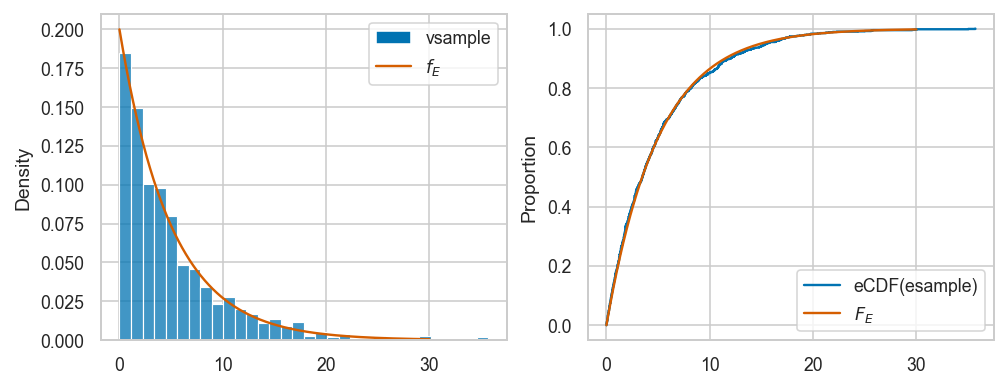

In [26]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
xs = np.linspace(0,30,1000)

# plot histogram of `esample`
sns.histplot(esample, stat="density", ax=axs[0], label="vsample")

# plot the pdf of rvE
sns.lineplot(x=xs, y=rvE.pdf(xs), color="r", ax=axs[0], label="$f_E$")
lines, labels = axs[0].get_legend_handles_labels()
axs[0].legend(reversed(lines[0:2]), reversed(labels[0:2]))

# plot a empirical cumulative distribution
sns.ecdfplot(esample, ax=axs[1], label="eCDF(esample)")

# plot the CDF of rvE
sns.lineplot(x=xs, y=rvE.cdf(xs), color="r", ax=axs[1], label="$F_E$")
axs[1].set_ylim(-0.05, 1.05)

### Using Q-Q plots to compare quantiles

The quantile-quantile plot `qqplot(data, dist)`
is used to compare the positions of the quantiles of the dataset `data`
against the quantiles of the theoretical distribution `dist`,
which is an instance of one of the probability models in `scipy.stats`.

The easiest way to generate a Q-Q plot is to use
the function `qqplot` defined in the the `statsmodels` package.

In [27]:
from statsmodels.graphics.api import qqplot

#### Examples of good fit


##### Normal data vs. the true normal model

Let's look at the quantiles of the data in `nsample`,
plotted versus the quantiles of the theoretical model $\mathcal{N}(1000,100)$.

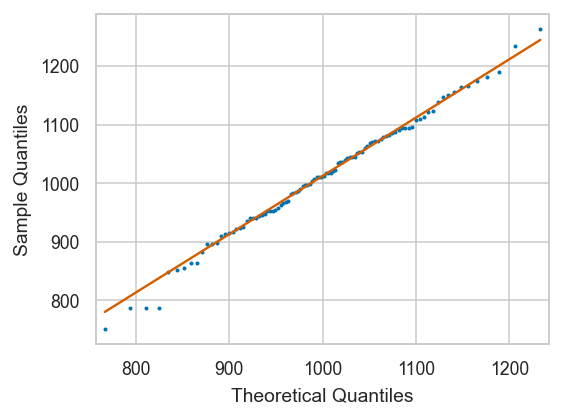

In [28]:
filename = "figures/prob/qqplot_nsample_vs_norm1000_100.pdf"
with plt.rc_context({"figure.figsize":(4,3)}):
    fig = qqplot(nsample, dist=norm(1000,100), line='q', markersize=1)
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Normal data vs. the standard normal

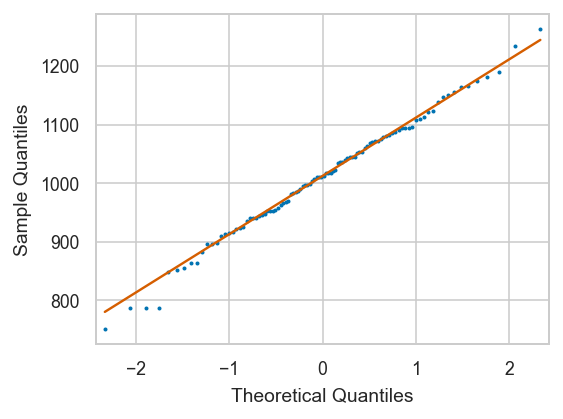

In [29]:
filename = "figures/prob/qqplot_nsample_vs_stdnorm.pdf"
with plt.rc_context({"figure.figsize":(4,3)}):
    fig = qqplot(nsample, dist=norm(0,1), line='q', markersize=1)
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Examples of bad fit

##### Shifted uniform data vs. standard normal

In [30]:
vsample = np.array(vsample)

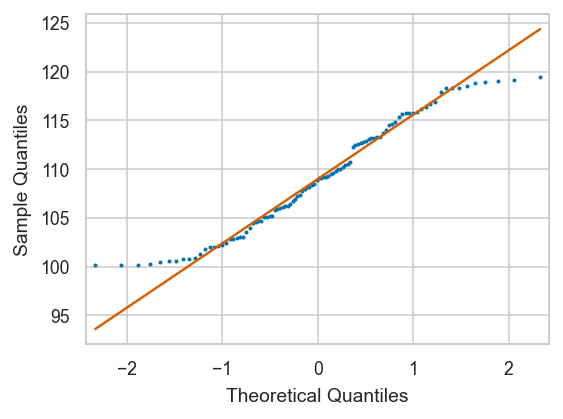

In [31]:
filename = "figures/prob/qqplot_vsample_vs_stdnorm.pdf"
with plt.rc_context({"figure.figsize":(4,3)}):
    fig = qqplot(vsample, dist=norm(0,1), line='q', markersize=1)
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

##### Exponential data vs. standard normal

In [32]:
esample = np.array(esample)

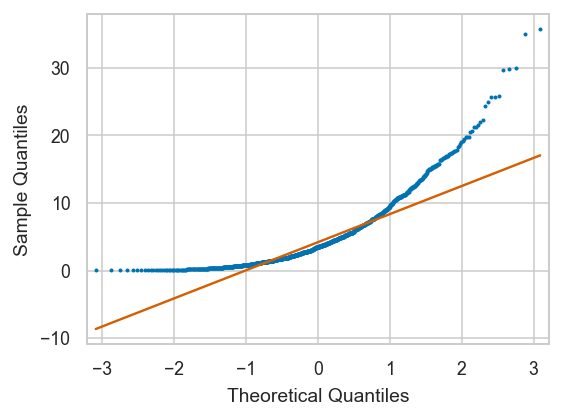

In [33]:
filename = "figures/prob/qqplot_esample_vs_stdnorm.pdf"
with plt.rc_context({"figure.figsize":(4,3)}):
    fig = qqplot(esample, dist=norm(0,1), line='q', markersize=1)
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Shifted uniform sample vs. true model

In [34]:
vsample = np.array(vsample)

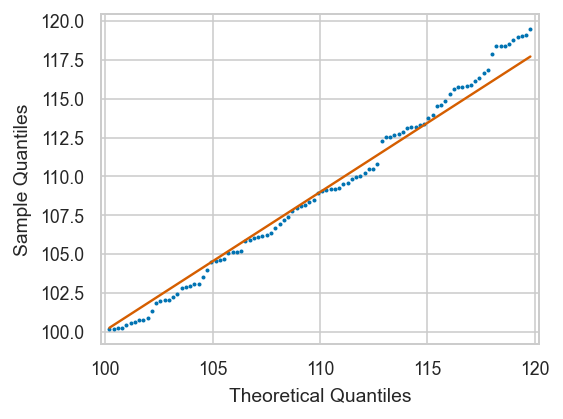

In [35]:
filename = "figures/prob/qqplot_vsample_vs_rvV.pdf"
with plt.rc_context({"figure.figsize":(4,3)}):
    fig = qqplot(vsample, dist=rvV, line='q', markersize=1)
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Exponential sample vs. true exponential model

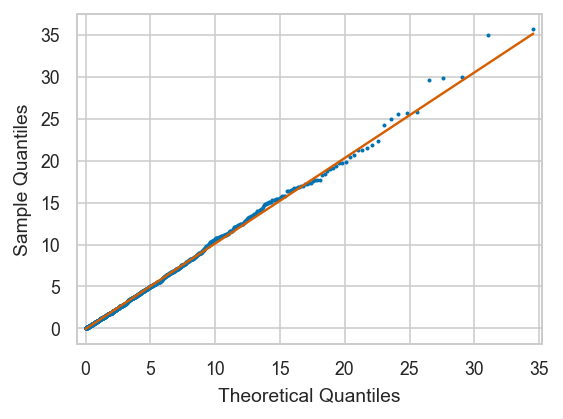

In [36]:
filename = "figures/prob/qqplot_esample_vs_rvE.pdf"
with plt.rc_context({"figure.figsize":(4,3)}):
    fig = qqplot(esample, dist=rvE, line='q', markersize=1)
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

### Comparing moments

A simple way to measure how well the data sample $\mathbf{x} = (x_1, x_2, \ldots , x_n)$
fits the probability model $f_X$ is to check if the data distribution
and the probability distribution have the same moments.

### Kolmogorov–Smirnov test

In [37]:
from scipy.stats import ks_1samp

Let's jump right ahead and compute the KS distance for the data and distribution of interest.

In [38]:
ks_1samp(nsample, rvN.cdf).statistic

0.07815466189999987

In [39]:
ks_1samp(esample, rvE.cdf).statistic

0.02352032687398309

In [40]:
ks_1samp(vsample, rvV.cdf).statistic

0.10459669229058577

#### Example of big distance

## Bootstrap sample generation

In [41]:
from scipy.stats import norm
rvN = norm(1000, 100)

np.random.seed(72)
sample = rvN.rvs(30)
sample

array([1031.85454991,  932.04405655,  779.16115305, 1059.02401628,
       1167.47660438,  833.40440269,  917.56612626, 1054.52603422,
       1000.11861932,  924.29694777, 1062.95451919,  990.43682345,
        849.21393503,  949.99869847, 1171.40102725,  877.62327349,
       1139.59050836, 1041.44763431, 1151.96667669, 1139.0063404 ,
        891.5999061 ,  957.46318231,  937.81775307, 1145.86005158,
        872.50054515, 1112.86094852, 1179.05765281,  948.13164741,
        932.89197563, 1073.67607886])

In [42]:
print([round(val, 2) for val in sample[0:4]])

[1031.85, 932.04, 779.16, 1059.02]


In [43]:
sample.mean()

1004.1657229506349

Let's generate a bootstrap sample and compute its mean:

In [44]:
bsample = np.random.choice(sample,30)
bsample.mean()

989.8642131674898

Let's compute the means of $10$ bootstrap samples:

In [45]:
B = 10
bmeans = []
for k in range(0,B):
    bsample = np.random.choice(sample, 30)
    bmean = bsample.mean() 
    bmeans.append(bmean)

# bmeans

In [46]:
print([round(bmean, 2) for bmean in bmeans])

[1002.72, 968.09, 995.78, 964.45, 1011.08, 1013.17, 1027.03, 1041.01, 969.77, 1029.55]


In [47]:
max(abs(bmeans - sample.mean()))

39.719674810092215

#### Clarification: empirical distribution of `sample` is not the same as $f_N$

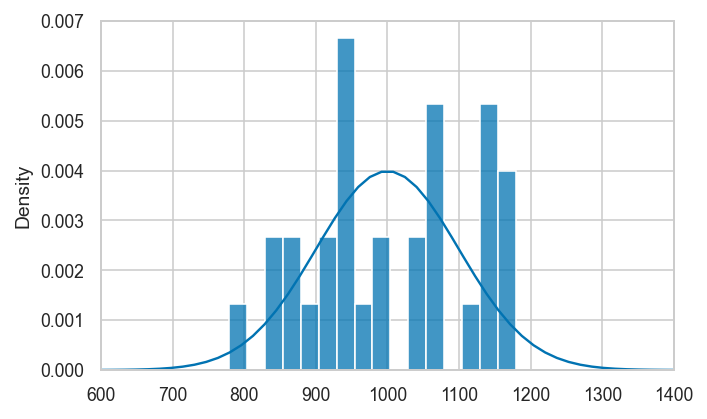

In [48]:
filename = "figures/prob/bootstrap_sample_from_norm1000_100.pdf"

# plot the pmf of uknown distritbuon f_N
from scipy.stats import norm
rvN = norm(1000, 100)
xs = np.linspace(600,1400)

with plt.rc_context({"figure.figsize":(5,3)}):
    ax = sns.lineplot(x=xs, y=rvN.pdf(xs))
    sns.histplot(sample, binwidth=25, ax=ax, stat="density")
    ax.set_xlim(600,1400)
    ax.figure.tight_layout()
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

In [49]:
# TODO: stem plot of sample
# TODO: stem plot alpha=0.1 of bsamples

## Discussion